In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sqlalchemy import create_engine
from config import dbuser,dbpassword,dbhost, dbport

In C:\Users\zorta\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zorta\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zorta\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\zorta\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\zorta\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [4]:

dbname= 'Employee_database'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")
conn = engine.connect()

In [5]:

# Query All Records in the employees Table
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [6]:
# Query all Records in the salaries Table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [7]:
# Query All Records in the titles Table
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [8]:
#merging employees and salaries table
first_table_merge = pd.merge(employees, salaries, on="emp_no", how="right")
first_table_merge.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [12]:
new_first_merge = first_table_merge.rename(columns={'emp_title': 'title_id'})


In [13]:
new_first_merge.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000


In [14]:
#merging titles with the employee-salaries table
employee_data = pd.merge(new_first_merge, titles, on="title_id", how="right")
employee_data.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016,Staff


In [19]:
title_salary= employee_data [['title', 'salary']]
title_salary.tail()

,title,salary
300019,Manager,72446
300020,Manager,71148
300021,Manager,60026
300022,Manager,40000
300023,Manager,40000


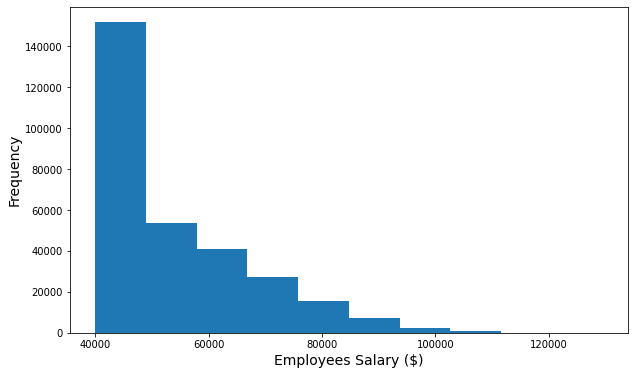

In [33]:
#creating histogram 
plt.figure(figsize=(10,6))
salary = salary_title['salary']
plt.hist(salary)
plt.xlabel('Employees Salary ($)', fontsize= 14)
plt.ylabel('Frequency',fontsize= 14)
plt.show()

## histogram for each title 

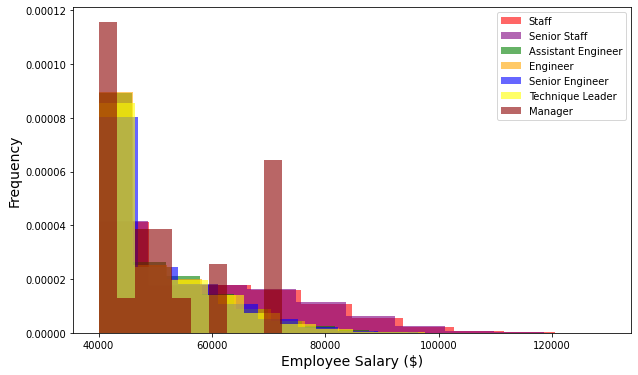

In [34]:
staff = title_salary.loc[title_salary['title']=='Staff', 'salary']
senior_staff = title_salary.loc[title_salary['title']=='Senior Staff', 'salary']
asst_eng = title_salary.loc[title_salary['title']=='Assistant Engineer', 'salary']
engi = title_salary.loc[title_salary['title']=='Engineer', 'salary']
seni_eng = title_salary.loc[title_salary['title']=='Senior Engineer', 'salary']
tech = title_salary.loc[title_salary['title']=='Technique Leader', 'salary']
manager = title_salary.loc[title_salary['title']=='Manager', 'salary']

plt.figure(figsize=(10,6))


plt.hist(staff, density=True, color='red', alpha=0.6, label="Staff")
plt.hist(senior_staff, density=True, color='purple', alpha=0.6, label="Senior Staff")
plt.hist(asst_eng, density=True, color='green', alpha=0.6, label="Assistant Engineer")
plt.hist(engi, density=True, color='orange', alpha=0.6, label="Engineer")
plt.hist(seni_eng, density=True, color='blue', alpha=0.6, label="Senior Engineer")
plt.hist(tech, density=True, color='yellow', alpha=0.6, label="Technique Leader")
plt.hist(manager, density=True, color='darkred', alpha=0.6, label="Manager")

plt.ylabel('Frequency', fontsize = 14)
plt.xlabel("Employee Salary ($)", fontsize = 14)
plt.legend()  


In [29]:
#calculating average salary for each title (position)
mean_salary = title_salary.groupby('title')['salary'].mean()
mean_salary

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0, 0.5, 'salary ($)')

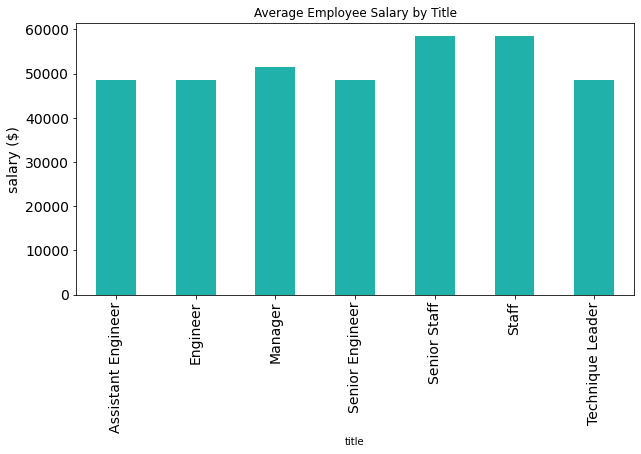

In [32]:
#creating bar plot
salary_bar = mean_salary.plot(kind='bar', figsize=(10,5), fontsize= 14, facecolor ='lightseagreen', title='Average Employee Salary by Title')
salary_bar.set_ylabel('salary ($)', fontsize=14)